# Tinkering with KMeans Clustering

In [1]:
import pandas as pd
import pandas_profiling

### EDA

In [2]:
customers = pd.read_csv("data/customers.csv")
print(customers.shape)
display(customers.head())

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# VERY useful library for EDA
# pandas_profiling.ProfileReport(customers)

### Finding K, the number of clusters

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
X = customers.loc[:,'Fresh':]

mm_scaler = MinMaxScaler()
X_mm_scaled = mm_scaler.fit_transform(X)

std_scaler = StandardScaler()
X_std_scaled = std_scaler.fit_transform(X)

/Users/maileivargas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/maileivargas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maileivargas/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**Elbow graphs using the within cluster sum squares**

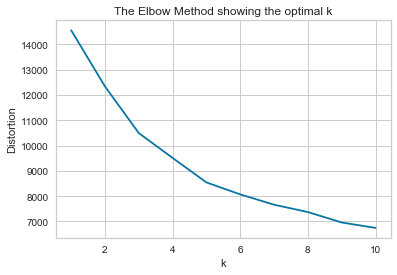

In [8]:
# k means determine k without scaling
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k');

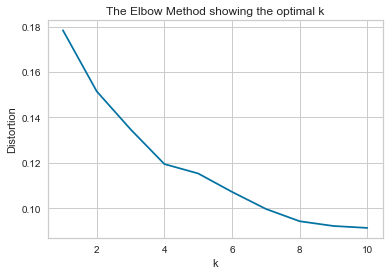

In [9]:
# k means determine k with min/max scaling
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_mm_scaled)
    kmeanModel.fit(X_mm_scaled)
    distortions.append(sum(np.min(cdist(X_mm_scaled, kmeanModel.cluster_centers_, 
                                        'euclidean'), axis=1)) / X_mm_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k');

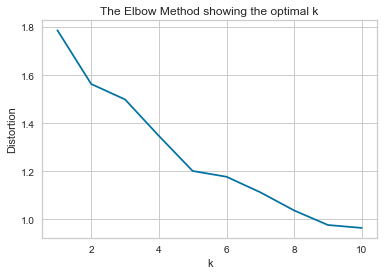

In [10]:
# k means determine k with standard scaling
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_std_scaled)
    kmeanModel.fit(X_std_scaled)
    distortions.append(sum(np.min(cdist(X_std_scaled, kmeanModel.cluster_centers_, 
                                        'euclidean'), axis=1)) / X_std_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k');

**Elbow graphs using silhouhette scores**

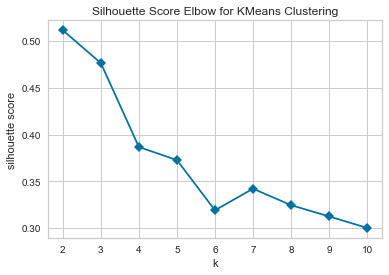

In [11]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
kmeanModel = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeanModel, k=10, metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof(); 

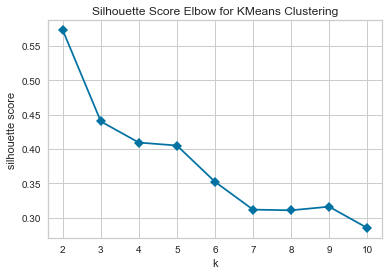

In [12]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
kmeanModel = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeanModel, k=10, metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X_mm_scaled)    
visualizer.poof(); 

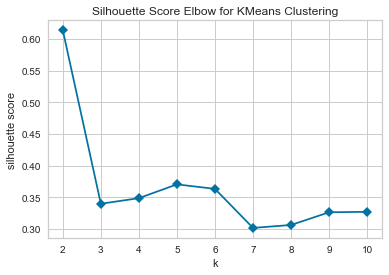

In [13]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
kmeanModel = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeanModel, k=10, metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X_std_scaled)    
visualizer.poof(); 

## Implementing K-Means

In [14]:
# From above 2 clusers seem tp get the best results
# Specify the number of clusters (2) and fit the data X
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_std_scaled)

In [15]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[ 0.1231618   2.18756617  2.38629985  0.39115335  2.44304525  0.92920983]
 [-0.01097481 -0.19493164 -0.21264058 -0.03485525 -0.2176971  -0.08280088]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1

In [16]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.5618864919703528
